In [1]:
# libraries (do not import additional libraries)
from tensorflow import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import pickle
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#Append the directory to your python path using sys
import sys
import os
prefix = '/content/drive/My Drive/'
customized_path_to_your_homework = 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)

data_file = open(os.path.join(sys_path, 'data_for_training.pkl'), 'rb')
data = pickle.load(data_file)

Mounted at /content/drive


In [3]:
# parameters for our model
batch_size = 32
num_classes = 2
epochs = 30

In [4]:
X = [i[0] for i in data] # Split into data and labels
y = [i[1] for i in data]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print(f"{sum(i for i in y_train)}, {len(y_train)}")
print(f"{sum(i for i in y_test)}, {len(y_test)}")
# replace True with [0, 1] and False with [1, 0]
y_train = [[i, not i] for i in y_train]
y_test = [[i, not i] for i in y_test]

13696, 25947
3360, 6487


In [5]:
def base_dnn(hidden_layer=0):
  # Define a dense neural network containing 'hidden_layer' + 1 hidden layers.
  model = Sequential()

  model.add(Dense(512, input_shape=(3,30))) # 3 tangles with 30 crossings each
  model.add(Activation('relu'))

  for _ in range(hidden_layer):
      model.add(Dense(512))
      model.add(Activation('relu'))
      model.add(Dropout(0.5))

  model.add(Flatten())
  
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # initiate RMSprop optimizer
  opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

  # Compile the model before using it
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  print(model.summary())

  return model

Training DNN with 1 hidden layers
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3, 512)            15872     
                                                                 
 activation (Activation)     (None, 3, 512)            0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 3074      
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 18,946
Trainable params: 18,946
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
81

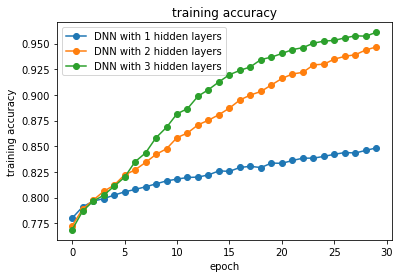

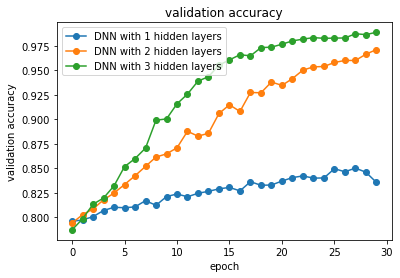

In [6]:
history_dnn = dict()
for l in range(3):
    print('Training DNN with {} hidden layers'.format(l+1))
    save_best_model = ModelCheckpoint('best_model.{}hiddenlayers'.format(l+1), monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
    model =  base_dnn(l)
    history_dnn[l] = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_train, y_train),
                            shuffle=True,
                            callbacks=[save_best_model])
  
# Plot training accuracy
for l in range(3):
    plt.plot(history_dnn[l].history['accuracy'], 'o-', label='DNN with {} hidden layers'.format(l+1))

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Plot validation accuracy
for l in range(3):
    plt.plot(history_dnn[l].history['val_accuracy'], 'o-', label='DNN with {} hidden layers'.format(l+1))
  
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()